<a href="https://colab.research.google.com/github/ParissaAmin/Machine-Learning/blob/main/Renewable%20Energy/EnergyEfficiency_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset Information**

**This study looked into assessing the heating load and cooling load requirements of buildings (that is, energy efficiency) as a function of building parameters.**

We perform energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.

#Dataset Characteristics
Multivariate

#Associated Tasks
Classification, Regression

Feature Type
Integer, Real

# Instances
768

# Features
8

In [ ]:
# Step 1: Import necessary libraries
import zipfile
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import requests

In [ ]:
# Step 2: Download and Extract Dataset from UCI Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"
file_name = "ENB2012_data.xlsx"

In [ ]:
# Downloading the dataset using requests
response = requests.get(url)
open(file_name, 'wb').write(response.content)

76189

In [ ]:
# Step 3: Loading dataset from the downloaded Excel file
data = pd.read_excel(file_name)

In [ ]:
# Displaying the first few rows of the dataset
print(data.head())

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [ ]:
# Step 4: Understanding the Data
# Check the shape of the dataset
print(f"Dataset Shape: {data.shape}")

Dataset Shape: (768, 10)


In [ ]:
# Checking for missing values
print(data.isnull().sum())

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64


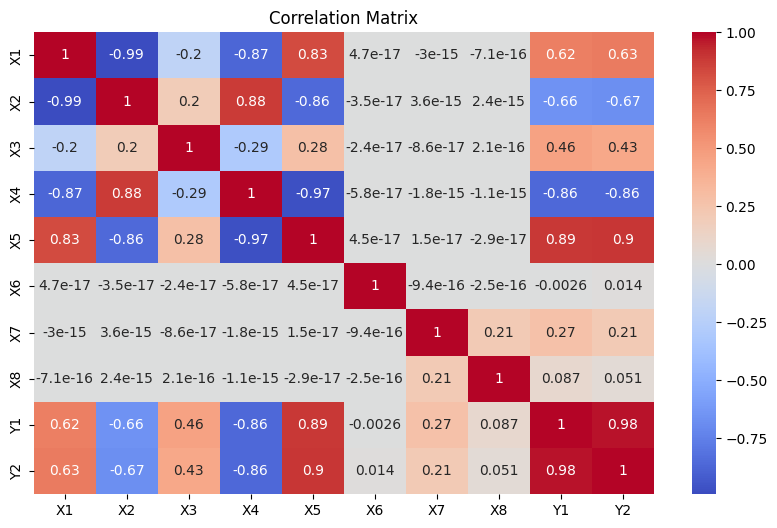

In [ ]:

# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

#Pre-Processing of Data



*  Handle Missing Values
*  Handle Outliers


*   Normalize the features
*  Feature Selection









In [ ]:
# Step 5: Handle Missing Values

data.fillna(data.median(), inplace=True)

In [ ]:
# Step 6: Handle Outliers
# Detect outliers using IQR method
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()
print("Outliers per column:\n", outliers)

# Optionally remove rows with outliers
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

Outliers per column:
 X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64


In [ ]:
# Step 7: Normalize/Scale Features
# Define feature columns and target variable
X = data[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]  # Features
y = data['Y1']  # Target: Heating Load


In [ ]:

# Normalize the features for consistent scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
# Step 8: Feature Selection
# Drop features with low correlation to the target
correlation_matrix = data.corr()
low_corr_features = correlation_matrix['Y1'][abs(correlation_matrix['Y1']) < 0.05].index
X = X.drop(low_corr_features, axis=1)

#Split the Data

In [ ]:
# Step 9:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of training and testing sets
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")


Training set: (614, 7), Testing set: (154, 7)


In [ ]:
# Step 10: Build and Train the Model
# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Step 11: Evaluate the Model
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

RMSE: 0.5248644394328278


In [ ]:
# Calculate MAE and R²
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}, R²: {r2}")

MAE: 0.3567913310048538, R²: 0.9973570343266627


In [ ]:
# Cross-validation for better generalization metrics
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-cv_scores)
print(f"Cross-validated RMSE: {rmse_scores.mean()} ± {rmse_scores.std()}")

Cross-validated RMSE: 1.1989180466519342 ± 1.1834028499452867


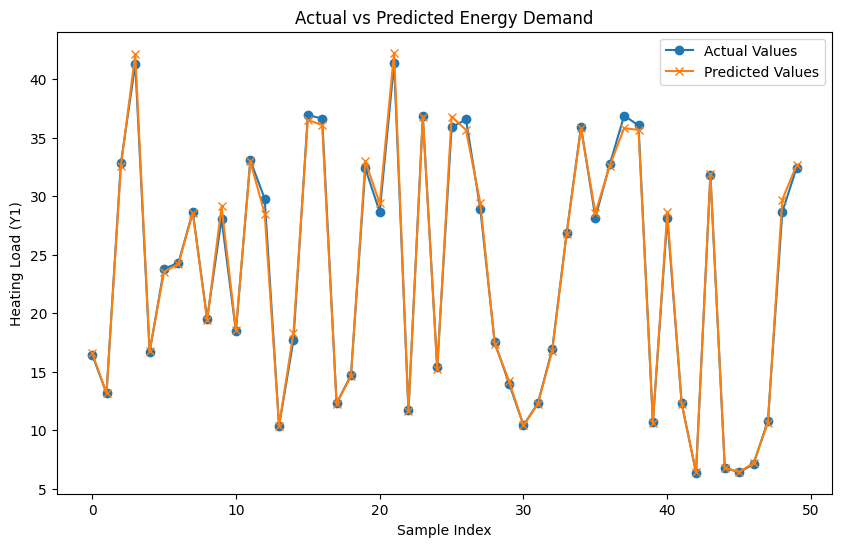

In [ ]:
# Step 12: Visualize the Results
# Compare the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:50], label="Actual Values", marker='o')
plt.plot(y_pred[:50], label="Predicted Values", marker='x')
plt.title("Actual vs Predicted Energy Demand")
plt.xlabel("Sample Index")
plt.ylabel("Heating Load (Y1)")
plt.legend()
plt.show()

In [ ]:
# Step 13: Optional - Save Your Work
# Save the trained model and predictions

import joblib

# Save the model as a .pkl file
joblib.dump(model, "energy_demand_model.pkl")

# Save predictions in a CSV file
predictions = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
predictions.to_csv("predictions.csv", index=False)

print("Model and predictions saved.")

Model and predictions saved.
